In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
np.random.seed(31415)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [21]:
df = pd.read_csv('D:\Downloads\CARS.csv')
df.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [22]:
colstocheck = df.columns
df[colstocheck] = df[colstocheck].replace({'\$':''}, regex = True)
df[colstocheck] = df[colstocheck].replace({',':''}, regex = True)
col_mask=df.isnull().any(axis=0) 
print(col_mask)
row_mask=df.isnull().any(axis=1)
df.loc[row_mask,col_mask]
df = df.dropna()
df['MSRP'] = df['MSRP'].astype(float)
df.head(5)

Make           False
Model          False
Type           False
Origin         False
DriveTrain     False
MSRP           False
Invoice        False
EngineSize     False
Cylinders       True
Horsepower     False
MPG_City       False
MPG_Highway    False
Weight         False
Wheelbase      False
Length         False
dtype: bool


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014,3.5,6.0,225,18,24,3880,115,197


In [23]:
df = df.drop(['Make','Model','Type','Origin','DriveTrain','Invoice'],axis=1)
df.head(5)

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,36945.0,3.5,6.0,265,17,23,4451,106,189
1,23820.0,2.0,4.0,200,24,31,2778,101,172
2,26990.0,2.4,4.0,200,22,29,3230,105,183
3,33195.0,3.2,6.0,270,20,28,3575,108,186
4,43755.0,3.5,6.0,225,18,24,3880,115,197


In [24]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [25]:
# Creating the Lasso Regression Model
reg = linear_model.Lasso(alpha=0.1)

In [26]:
X = df.drop("MSRP", axis=1)
y = df["MSRP"]
X = X.to_numpy()
X.ndim

2

In [28]:
y = y.to_numpy()
y.ndim

1

In [29]:
y

array([ 36945.,  23820.,  26990.,  33195.,  43755.,  46100.,  89765.,
        25940.,  35940.,  31840.,  33430.,  34480.,  36640.,  39640.,
        42490.,  44240.,  42840.,  49690.,  69190.,  48040.,  84600.,
        35940.,  37390.,  40590.,  40840.,  49090.,  37000.,  52195.,
        28495.,  30795.,  37995.,  30245.,  35495.,  36995.,  37245.,
        39995.,  44295.,  44995.,  54995.,  69195.,  73195.,  48195.,
        56595.,  33895.,  41045.,  32845.,  37895.,  26545.,  22180.,
        26470.,  24895.,  28345.,  32245.,  35545.,  40720.,  52795.,
        46995.,  30835.,  45445.,  50595.,  47955.,  76200.,  52975.,
        42735.,  41465.,  30295.,  20255.,  11690.,  12585.,  14610.,
        14810.,  16385.,  21900.,  18995.,  20370.,  21825.,  25000.,
        27995.,  23495.,  24225.,  26395.,  27020.,  44535.,  51535.,
        36100.,  18760.,  20310.,  40340.,  41995.,  22225.,  17985.,
        22000.,  19090.,  21840.,  29865.,  24130.,  26860.,  25955.,
        25215.,  332

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
# Printing the first five predicted values
pred[1:5]

array([23522.98541499, 26843.02538016, 29801.65828394, 36589.74177721])

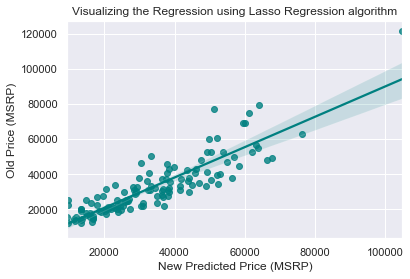

In [32]:
plt.title("Visualizing the Regression using Lasso Regression algorithm")
sns.regplot(x=pred, y=y_test, color = "teal")
plt.xlabel("New Predicted Price (MSRP)")
plt.ylabel("Old Price (MSRP)")
plt.show()

In [33]:
print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Coeffients are : ", reg.coef_)
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Intercepts are :" ,reg.intercept_)
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("The R2 square value of Lasso is :", r2_score(y_test, pred)*100)

Mean Absolute Error is : 6388.275470726807
 — — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 68993408.41981974
 — — — — — — — — — — — — — — — — — — — — — — — 
Coeffients are :  [-5825.81297551  2859.88394727   262.94386906  -101.16528747
   718.48335811     7.34593103  -722.01050804    53.82832991]
 — — — — — — — — — — — — — — — — — — — — — — — 
Intercepts are : 2924.300426956699
 — — — — — — — — — — — — — — — — — — — — — — — 
The R2 square value of Lasso is : 74.50189689274534


In [34]:
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Mean Squared Error is :", mean_squared_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Coeffients are : ", model.coef_)
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("Intercepts are :" ,model.intercept_)
print(" — — — — — — — — — — — — — — — — — — — — — — — ")
print("The R2 square value of Linear Regression is :", r2_score(y_test, pred)*100)

— — — — — — — — — — — — — — — — — — — — — — — 
Mean Squared Error is : 68993408.41981974
 — — — — — — — — — — — — — — — — — — — — — — — 


NameError: name 'model' is not defined